**Helpful Links: Where the Data Lives**

Open Academic Society: [Project Page](https://www.openacademic.ai/oag/)

Microsoft Research: [MS Academic Graph](https://www.microsoft.com/en-us/research/project/microsoft-academic-graph/)

## 例9-1 导入并过滤数据

In [1]:
import pandas as pd

In [19]:
model_df = pd.read_json('data/mag_papers_0/mag_subset20K.txt', lines=True)
model_df.shape

(20000, 19)

In [3]:
model_df.columns

Index(['abstract', 'authors', 'doc_type', 'doi', 'fos', 'id', 'issue',
       'keywords', 'lang', 'n_citation', 'page_end', 'page_start', 'publisher',
       'references', 'title', 'url', 'venue', 'volume', 'year'],
      dtype='object')

In [4]:
model_df.head()

,abstract,authors,doc_type,doi,fos,id,issue,keywords,lang,n_citation,page_end,page_start,publisher,references,title,url,venue,volume,year
0,A system and method for maskless direct write ...,NaN,NaN,NaN,"[Electronic engineering, Computer hardware, En...",0000002e-c2f2-4e25-9341-60d39130ac7a,NaN,NaN,en,NaN,NaN,NaN,NaN,"[354c172f-d877-4e60-a7eb-c1b1cf03ce4d, 76cf106...",System and Method for Maskless Direct Write Li...,[http://www.freepatentsonline.com/y2016/021111...,NaN,NaN,2015
1,NaN,[{'name': 'Ahmed M. Alluwaimi'}],NaN,10.4172/2157-7560.C1.030,"[Biology, Virology, Immunology, Microbiology]",0000003d-5ce0-4eed-a56f-bbd3f8d8242b,NaN,"[paratuberculosis, of, subspecies, proceedings...",en,NaN,NaN,NaN,OMICS International,NaN,The dilemma of the Mycobacterium avium subspec...,[http://www.omicsonline.org/proceedings/the-di...,NaN,NaN,2016
2,NaN,"[{'name': 'Jovana P. Lekovich', 'org': 'Weill ...",Journal,10.1016/j.fertnstert.2015.07.492,NaN,00000061-0bab-468b-9481-de0c899783f3,3.0,NaN,en,NaN,NaN,NaN,Elsevier,NaN,Should endometriosis be an indication for intr...,[http://www.fertstert.org/article/S0015-0282(1...,Fertility and Sterility,104.0,2015
3,NaN,[{'name': 'P. M. Voltes'}],NaN,NaN,[Performance art],00000081-4562-4882-a29d-5b9cb510ffc3,228.0,"[musica, arte]",es,NaN,NaN,6,Editorial Lira,NaN,Radio: Radio San Sebastián,[http://dialnet.unirioja.es/servlet/articulo?c...,NaN,20.0,1950
4,早期発見と治療成績の向上で担癌患者の生存期間が延びており，それに伴い重複癌を経験する機会も増...,"[{'name': '高田和外'}, {'name': 'ほか'}]",NaN,NaN,NaN,00000099-1ee9-4741-908c-02a7bf4857e8,4.0,NaN,ja,NaN,700,697,癌と化学療法社,NaN,異時性6 重複癌の1 例,[http://www.pieronline.jp/content/article/0385...,NaN,38.0,2011


In [21]:
# filter out non-English articles
# keep abstract, authors, fos, keywords, year, title
# 滤掉非英文文章，只关注几个变量
model_df = model_df[model_df.lang == 'en'].drop_duplicates(subset='title', keep='first').drop(
    ['doc_type', 'doi', 'id', 'issue', 'lang', 'n_citation', 'page_end',
        'page_start', 'publisher', 'references', 'url', 'venue', 'volume'],
    axis=1)
model_df.shape

(10399, 6)

In [22]:
model_df.head(2)

,abstract,authors,fos,keywords,title,year
0,A system and method for maskless direct write ...,NaN,"[Electronic engineering, Computer hardware, En...",NaN,System and Method for Maskless Direct Write Li...,2015
1,NaN,[{'name': 'Ahmed M. Alluwaimi'}],"[Biology, Virology, Immunology, Microbiology]","[paratuberculosis, of, subspecies, proceedings...",The dilemma of the Mycobacterium avium subspec...,2016


In [26]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10399 entries, 0 to 19999
Data columns (total 6 columns):
abstract    6006 non-null object
authors     10398 non-null object
fos         8666 non-null object
keywords    6105 non-null object
title       10399 non-null object
year        10399 non-null int64
dtypes: int64(1), object(5)
memory usage: 568.7+ KB


In [50]:
model_df[:10].to_json('data/mag_papers_0/mag_subset6column.json', orient='records')

## 例9-2 协同过滤阶段 1：建立项目特征矩阵

We can already see that this dataset will need some wrangling. Lists and dictionaries are good for data storage, but not [tidy](http://vita.had.co.nz/papers/tidy-data.html) or well-suited for machine learning without some unpacking.

In [27]:
unique_fos = sorted(list({feature
                          for paper_row in model_df.fos.fillna('0')
                          for feature in paper_row}))

unique_year = sorted(model_df['year'].astype('str').unique())

len(unique_fos + unique_year)

7760

In [36]:
len(unique_fos)

7604

In [35]:
# model_df.shape[0] - pd.isnull(model_df['fos']).sum()
model_df.shape[0] - model_df['fos'].isnull().sum()

8666

In [29]:
pd.isnull(model_df['fos']).sum()

1733

In [34]:
model_df['fos'].isnull().sum()

1733

In [40]:
import random
# [unique_fos[i] for i in sorted(random.sample(range(len(unique_fos)), 15))]
sorted(random.sample(unique_fos, 15))

['Binary star',
 'Calcium ATPase',
 'Empty string',
 'Estrous cycle',
 'Germanium',
 'Histopathology',
 'Management accounting',
 'Nuclear matrix',
 'Positive feedback',
 'Privacy',
 'Sea urchin skeletogenesis',
 'Shield',
 'Spoken word',
 'Station',
 'Thermal conductivity']

In [51]:
def feature_array(x, unique_array):
    row_dict = {}
    for i in x.index:
        var_dict = {}

        for j in range(len(unique_array)):
            if type(x[i]) is list:
                if unique_array[j] in x[i]:
                    var_dict.update({unique_array[j]: 1})
                else:
                    var_dict.update({unique_array[j]: 0})
            else:
                if unique_array[j] == str(x[i]):
                    var_dict.update({unique_array[j]: 1})
                else:
                    var_dict.update({unique_array[j]: 0})

        row_dict.update({i: var_dict})

    """
    in:
    a = {1: {'a': 0, 'b': 1}, 2: {'a': 1, 'c': 0}}
    pd.DataFrame(a).T
    out:
         a    b    c
    1  0.0  1.0  NaN
    2  1.0  NaN  0.0
    """

    feature_df = pd.DataFrame.from_dict(row_dict, dtype='str').T

    return feature_df

In [52]:
%time year_features = feature_array(model_df['year'], unique_year)

CPU times: user 40.5 s, sys: 0 ns, total: 40.5 s
Wall time: 40.5 s


In [64]:
from sys import getsizeof
print('%f GB' % float(getsizeof(year_features) / 2 ** 30))

0.099792 GB


In [65]:
%time fos_features = feature_array(model_df['fos'], unique_fos)

CPU times: user 40min 31s, sys: 696 ms, total: 40min 31s
Wall time: 40min 31s
Size of fos feature array:  4.8605417385697365


In [68]:
print('Size of fos feature array: %.2f GB' %
      (getsizeof(fos_features) / 2 ** 30))

Size of fos feature array: 4.86 GB


In [66]:
year_features.shape[1] + fos_features.shape[1]

7760

In [82]:
fos_features.head()

,0,0-10 V lighting control,1/N expansion,10G-PON,14-3-3 protein,2-choice hashing,20th-century philosophy,2D computer graphics,2DEG,3-D Secure,...,k-nearest neighbors algorithm,m-derived filter,microRNA,pH,photoperiodism,route,strictfp,string,Ćuk converter,μ operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
year_features.head()

,1831,1832,1833,1834,1836,1837,1840,1841,1845,1847,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# now looking at 10399 x  7760 array for our feature space
%time first_features = fos_features.join(year_features).T

CPU times: user 9.22 s, sys: 4.01 ms, total: 9.22 s
Wall time: 9.21 s


In [79]:
first_size = getsizeof(first_features) / 2 ** 30
print('Size of first feature array: {:.2}GB'.format(first_size))

Size of first feature array: 5.0GB


Let's see how our current features perform at giving us a good recommendation. We'll define a "good" recommendation as a paper that looks similar to the input.

We will start with a simple example of building a recommender with just a few fields, building sparse arrays of available features to calculate for the cosine similary between papers. We will see if reasonably similar papers can be found in a timely manner.

In [81]:
print(first_features.shape)
first_features.head()

(7760, 10399)


,0,1,2,5,7,8,9,10,11,12,...,19985,19986,19987,19988,19993,19994,19995,19997,19998,19999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0-10 V lighting control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/N expansion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10G-PON,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14-3-3 protein,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 例9-3 协同过滤阶段 2：查找相似项目

[余弦距离](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)

In [84]:
from scipy.spatial.distance import cosine
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

def item_collab_filter(features_df):
    item_similarities = pd.DataFrame(index=features_df.columns, columns=features_df.columns)

    for i in features_df.columns:
        for j in features_df.columns:
            item_similarities.loc[i][j] = 1 - cosine(features_df[i], features_df[j])

    return item_similarities

In [90]:
first_features.loc[:, 0:1000].astype(int).info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 2017
Columns: 515 entries, 0 to 1000
dtypes: int64(515)
memory usage: 30.5+ MB


In [91]:
%time first_items = item_collab_filter(first_features.loc[:, 0:1000].astype(int))

CPU times: user 1min 40s, sys: 36 ms, total: 1min 40s
Wall time: 1min 40s


We need to get a better idea of how these features will translate to us getting a good recommendation. Do we have enough observations to move forward? Let's plot a heatmap to see if we have any papers that are similar to each other.

## 例9-4 论文推荐热图

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
%matplotlib inline

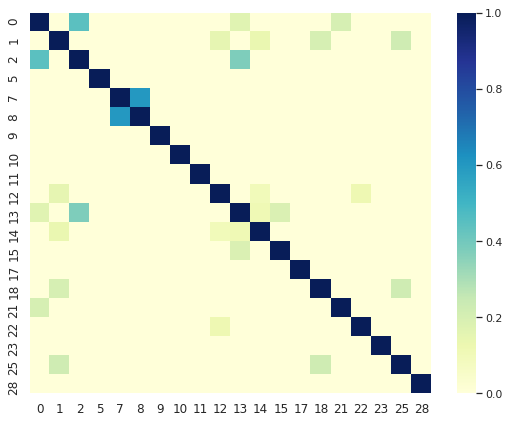

In [112]:
plt.figure(figsize=(9, 7))
sns.set()
ax = sns.heatmap(first_items.fillna(0).iloc[:20, :20],
                 vmin=0, vmax=1,
                 cmap="YlGnBu")
ax.tick_params(labelsize=12)

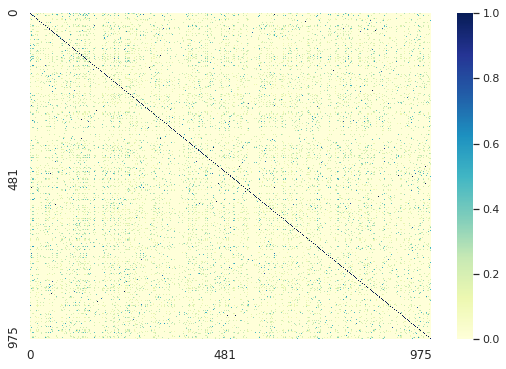

In [109]:
plt.figure(figsize=(9, 6))
sns.set()
ax = sns.heatmap(first_items.fillna(0), 
                 vmin=0, vmax=1, 
                 cmap="YlGnBu", 
                 xticklabels=250, yticklabels=250)
ax.tick_params(labelsize=12)

## 例9-5 基于项目的协同过滤推荐

In [138]:
def paper_recommender(paper_index, items_df):
    print('Based on the paper: \nindex = ', paper_index)
    print(model_df.iloc[paper_index])
    # ascending=False 倒序
    top_results = items_df.iloc[paper_index].sort_values(ascending=False).head(4)
    print('\nTop three results: ')
    order = 1
    for i in top_results.index.tolist()[-3:]:
        print(order, '. Paper index = ', i)
        print('Similarity score: ', top_results[i])
        print(model_df.iloc[i], '\n')
        if order < 5:
            order += 1

In [139]:
paper_recommender(2, first_items)

Based on the paper: 
index =  2
abstract                                                  NaN
authors     [{'name': 'Jovana P. Lekovich', 'org': 'Weill ...
fos                                                       NaN
keywords                                                  NaN
title       Should endometriosis be an indication for intr...
year                                                     2015
Name: 2, dtype: object

Top three results: 
1 . Paper index =  2
Similarity score:  1.0
abstract                                                  NaN
authors     [{'name': 'Jovana P. Lekovich', 'org': 'Weill ...
fos                                                       NaN
keywords                                                  NaN
title       Should endometriosis be an indication for intr...
year                                                     2015
Name: 2, dtype: object 

2 . Paper index =  292
Similarity score:  1.0
abstract                                                  NaN
aut

In [146]:
top_results = first_items.iloc[2].sort_values(ascending=False).head(4)
top_results.index.tolist()[-3:]

[2, 292, 593]

In [145]:
top_results

525    1
2      1
292    1
593    1
Name: 2, dtype: object